In [1]:
from scripts.pipeline_tools import (
    prepare_data,
    regressor_uncertainty,
    select_unstable_data,
    retrain_regressor,
    uncertainty_change,
    mse_change,
)
from scripts.Models import ITGDatasetDF, load_model, ITGDataset
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader
from scripts.utils import train_keys
import copy
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import yaml 

In [2]:
with open('pipeline_config.yaml') as f:
    cfg = yaml.load(f, Loader=yaml.FullLoader)

pretrained = cfg['pretrained']
paths = cfg['data']

In [3]:
train_data, val_data = prepare_data(
    paths['train'], paths['validation'], target_column="efiitg_gb", target_var="itg"
)

scaler = StandardScaler()
scaler.fit_transform(train_data.drop(["itg"], axis=1))

train_dataset = ITGDatasetDF(train_data, target_column="efiitg_gb", target_var="itg")
valid_dataset = ITGDatasetDF(val_data, target_column="efiitg_gb", target_var="itg")

# # TODO: further testing of the scale function
train_dataset.scale(scaler)
valid_dataset.scale(scaler)

In [4]:
# Load pretrained models
print("Loaded the following models:\n")
models = {}
for model in pretrained:
    if pretrained[model]["trained"] == True:
        trained_model = load_model(model, pretrained[model]["save_path"])
        models[model] = trained_model

Loaded the following models:

Model Loaded: ITG_class
Model Loaded: ITG_reg


In [5]:
# TODO: Needs to be the true training samples used!!!
train_sample = train_dataset.sample(10_000)


Iteration: 0


Running classifier selection...



100%|██████████| 100/100 [00:03<00:00, 26.04it/s]



Stable points: 7450
Misclassified points: 670
Percentage of misclassified points:  6.7%

Dropped 7701 rows

Running MC Dropout on Novel Data....



100%|██████████| 15/15 [00:19<00:00,  1.31s/it]



Number of points passed for MC dropout: 2299

Running MC Dropout on Training Data....



100%|██████████| 15/15 [01:32<00:00,  6.17s/it]



Number of points passed for MC dropout: 10000

Retraining regressor...

Training on 10574 points


100%|██████████| 11/11 [00:15<00:00,  1.44s/it]


Initial loss: 0.6859
Train Step:  0
Loss: 1.1386
Validation Step:  0


100%|██████████| 11/11 [00:15<00:00,  1.40s/it]


Test loss: 0.6052
Train Step:  1
Loss: 0.9875
Train Step:  2
Loss: 0.8746
Train Step:  3
Loss: 0.7878
Train Step:  4
Loss: 0.7373
Train Step:  5
Loss: 0.7167
Train Step:  6
Loss: 0.6853
Train Step:  7
Loss: 0.6504
Train Step:  8
Loss: 0.6061
Train Step:  9
Loss: 0.5608
Train Step:  10
Loss: 0.5175
Validation Step:  10


100%|██████████| 11/11 [00:17<00:00,  1.58s/it]


Test loss: 0.3479
Train Step:  11
Loss: 0.5021
Train Step:  12
Loss: 0.4862
Train Step:  13
Loss: 0.4768
Train Step:  14
Loss: 0.4527
Train Step:  15
Loss: 0.4309
Train Step:  16
Loss: 0.3982
Train Step:  17
Loss: 0.3881
Train Step:  18
Loss: 0.3726
Train Step:  19
Loss: 0.3669
Train Step:  20
Loss: 0.3552
Validation Step:  20


100%|██████████| 11/11 [00:16<00:00,  1.46s/it]


Test loss: 0.2731
Train Step:  21
Loss: 0.3454
Train Step:  22
Loss: 0.3377
Train Step:  23
Loss: 0.3400
Train Step:  24
Loss: 0.3189

Running MC Dropout on Novel Data....



100%|██████████| 15/15 [00:18<00:00,  1.26s/it]



Number of points passed for MC dropout: 2299

Running MC Dropout on Training Data....



100%|██████████| 15/15 [01:28<00:00,  5.88s/it]



Number of points passed for MC dropout: 10000

Novel Data Uncertainty changes...

 Decreased 94.599% Increased: 5.401 % No Change: 0.000 
Initial Average Uncertainty: 0.5171, Final Average Uncertainty: 0.3259

Training Data Uncertainty changes...

 Decreased 75.790% Increased: 24.210 % No Change: -0.000 
Initial Average Uncertainty: 0.1058, Final Average Uncertainty: 0.0857

Change in MSE for novel dataset: 0.6781


Change in MSE for train dataset: 0.0466


Iteration: 1


Running classifier selection...



100%|██████████| 100/100 [00:03<00:00, 25.79it/s]



Stable points: 7538
Misclassified points: 628
Percentage of misclassified points:  6.28%

Dropped 7773 rows

Running MC Dropout on Novel Data....



100%|██████████| 15/15 [00:19<00:00,  1.27s/it]



Number of points passed for MC dropout: 2227

Running MC Dropout on Training Data....



100%|██████████| 15/15 [01:39<00:00,  6.65s/it]



Number of points passed for MC dropout: 10574

Retraining regressor...

Training on 11130 points


100%|██████████| 11/11 [00:15<00:00,  1.43s/it]


Initial loss: 0.7687
Train Step:  0
Loss: 1.6290
Validation Step:  0


100%|██████████| 11/11 [00:16<00:00,  1.46s/it]


Test loss: 0.7135
Train Step:  1
Loss: 1.4848
Train Step:  2
Loss: 1.3788
Train Step:  3
Loss: 1.3028
Train Step:  4
Loss: 1.2452
Train Step:  5
Loss: 1.1938
Train Step:  6
Loss: 1.1474
Train Step:  7
Loss: 1.1058
Train Step:  8
Loss: 1.0650
Train Step:  9
Loss: 1.0308
Train Step:  10
Loss: 0.9752
Validation Step:  10


100%|██████████| 11/11 [00:15<00:00,  1.44s/it]


Test loss: 0.6302
Train Step:  11
Loss: 0.9242
Train Step:  12
Loss: 0.8743
Train Step:  13
Loss: 0.8245
Train Step:  14
Loss: 0.7933
Train Step:  15
Loss: 0.7625
Train Step:  16
Loss: 0.7515
Train Step:  17
Loss: 0.7299
Train Step:  18
Loss: 0.6961
Train Step:  19
Loss: 0.6647
Train Step:  20
Loss: 0.6342
Validation Step:  20


100%|██████████| 11/11 [00:16<00:00,  1.48s/it]


Test loss: 0.4419
Train Step:  21
Loss: 0.6137
Train Step:  22
Loss: 0.5934
Train Step:  23
Loss: 0.5887
Train Step:  24
Loss: 0.5604

Running MC Dropout on Novel Data....



100%|██████████| 15/15 [00:18<00:00,  1.23s/it]



Number of points passed for MC dropout: 2227

Running MC Dropout on Training Data....



100%|██████████| 15/15 [01:32<00:00,  6.16s/it]



Number of points passed for MC dropout: 10574

Novel Data Uncertainty changes...

 Decreased 93.345% Increased: 6.655 % No Change: 0.000 
Initial Average Uncertainty: 0.3665, Final Average Uncertainty: 0.2576

Training Data Uncertainty changes...

 Decreased 51.031% Increased: 48.969 % No Change: 0.000 
Initial Average Uncertainty: 0.0985, Final Average Uncertainty: 0.0937

Change in MSE for novel dataset: 0.3552


Change in MSE for train dataset: 0.1428



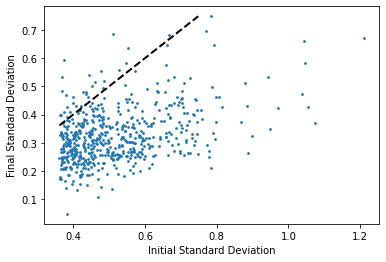

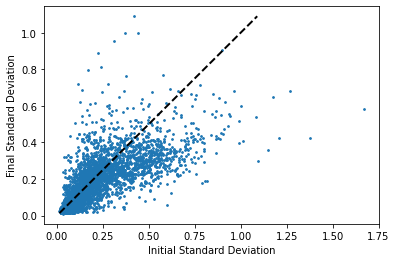

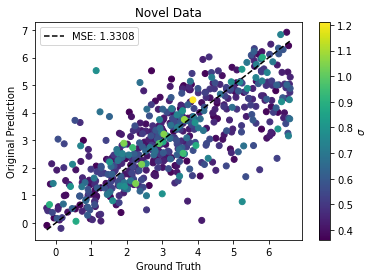

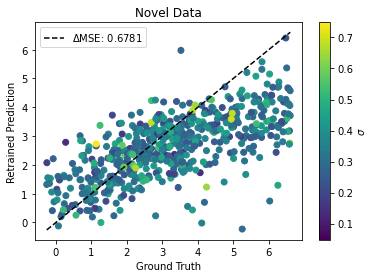

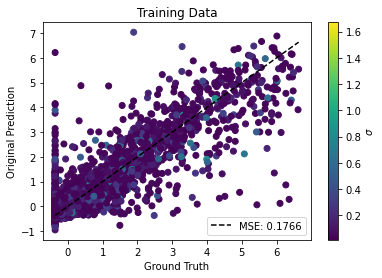

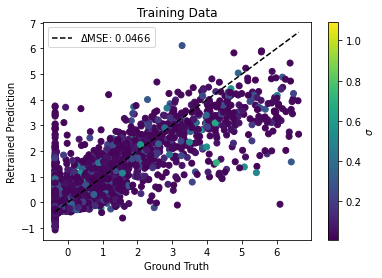

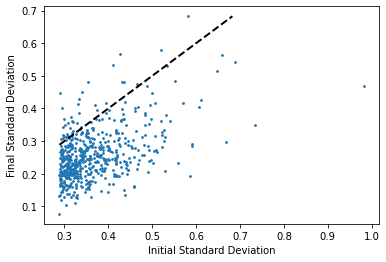

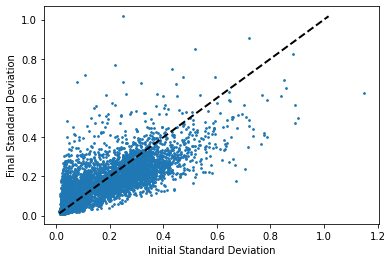

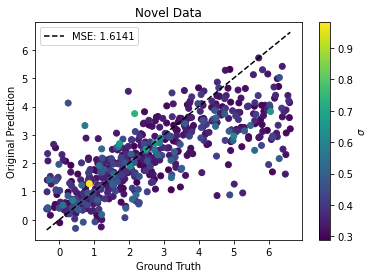

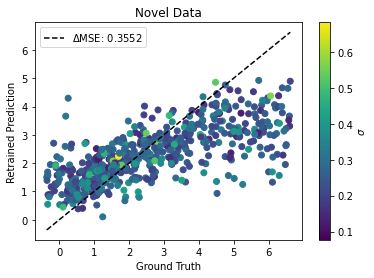

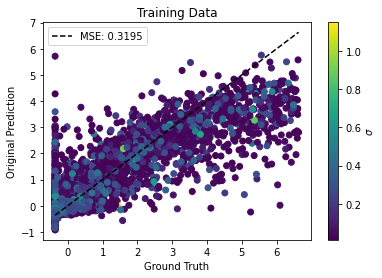

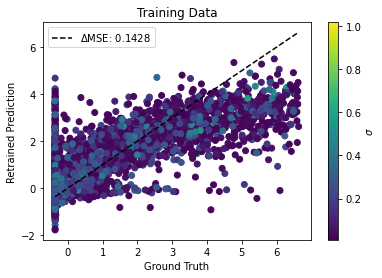

In [6]:
iterations = 2
train_losses = []
test_losses = []
for i in range(iterations):
    print(f"\nIteration: {i}\n")
    valid_sample = valid_dataset.sample(10_000)

    # remove the sampled data points from the dataset
    valid_dataset.remove(valid_sample.data.index)

    select_unstable_data(valid_sample, batch_size=100, classifier=models["ITG_class"])

    uncertain_datset, uncert_before, data_idx = regressor_uncertainty(
    valid_sample, models["ITG_reg"], n_runs=15, keep=0.25
)
    train_sample_origin, train_uncert_before, train_uncert_idx = regressor_uncertainty(
        train_sample, models["ITG_reg"], n_runs=15,train_data=True
        )

    train_sample.add(uncertain_datset)

    uncertain_loader = DataLoader(train_sample, batch_size=len(train_sample), shuffle=True)

    prediction_before, prediction_idx_order = models["ITG_reg"].predict(uncertain_loader)

    # Switching validation dataset to numpy arrays to see if it is quicker
    x_array = valid_dataset.data[train_keys].values
    y_array = valid_dataset.data["itg"].values
    z_array = valid_dataset.data["efiitg_gb"].values
    dataset_numpy = ITGDataset(x_array, y_array, z_array)
    valid_loader = DataLoader(
        dataset_numpy, batch_size=int(0.1 * len(y_array)), shuffle=True
    )

    # Retrain Regressor (Further research required)
    train_loss, test_loss = retrain_regressor(
        uncertain_loader,
        valid_loader,
        models["ITG_reg"],
        learning_rate=1e-3,
        epochs=25,
        validation_step=True,
        mode="shrink_perturb",
    )

    train_losses.append(train_loss)
    test_losses.append(test_loss)

    prediction_after,_ = models["ITG_reg"].predict(uncertain_loader, prediction_idx_order)

    _, uncert_after,_ = regressor_uncertainty(valid_sample, models["ITG_reg"], n_runs=15, keep=0.25, order_idx=data_idx)
    _, train_uncert_after,_ = regressor_uncertainty(train_sample_origin, models["ITG_reg"], n_runs=15,order_idx=train_uncert_idx, train_data=True)
   
    print("\nNovel Data Uncertainty changes...\n")
    uncertainty_change(x=uncert_before, y=uncert_after);

    print("\nTraining Data Uncertainty changes...\n")
    uncertainty_change(x=train_uncert_before, y=train_uncert_after);
    
    mse_change(prediction_before, prediction_after,prediction_idx_order,data_idx, uncertain_loader,[uncert_before, uncert_after])

    mse_change(
    prediction_before,
    prediction_after,
    prediction_idx_order,
    train_uncert_idx,
    uncertain_loader,
    uncertainties=[train_uncert_before, train_uncert_after],
    data="train"
     )

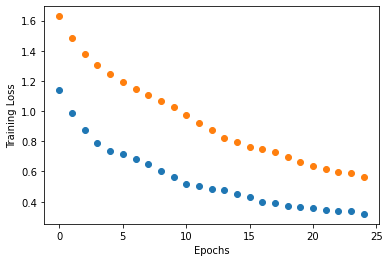

In [7]:
plt.figure()
for i in range(len(train_losses)):
    plt.scatter(np.arange(0,len(train_losses[i])), train_losses[i]);

plt.xlabel("Epochs")
plt.ylabel("Training Loss");

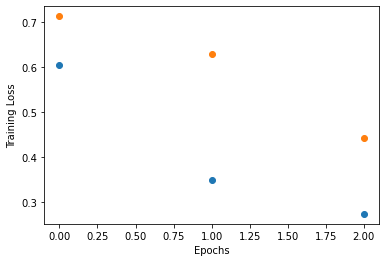

In [8]:
plt.figure()
for i in range(len(test_losses)):
    plt.scatter(np.arange(0,len(test_losses[i])), test_losses[i]);

plt.xlabel("Epochs")
plt.ylabel("Training Loss");

In [9]:
test_losses

[[0.6051875149419781, 0.34790672986072463, 0.2731153282579757],
 [0.7134889062415131, 0.630209615337238, 0.44194351093321005]]